In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


train= pd.read_csv('C:/Users/roger/Documents/DMT/2/training_set_VU_DM_2014.csv')
test= pd.read_csv('C:/Users/roger/Documents/DMT/2/test_set_VU_DM_2014.csv')

In [6]:
#randomForestIntro
from sklearn.ensemble import RandomForestClassifier

#X = [[ 4958347, 54], [1, 1]]
#Y = [4959183, 50]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [ ]:
X = train.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
X = X.fillna(train.mean())
Y = train['booking_bool']

In [ ]:
#decision treea
#X, y = make_blobs(n_samples=4958347, n_features=54, centers=90000, random_state=0) 
#clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X, Y)
#scores.mean()
X = X.sample(frac=0.1, replace=True)
Y = X['booking_bool']

In [7]:
#sampling attempt
train = train.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
train = train.sample(frac=0.1, replace=True)


ValueError: labels ['booking_bool' 'date_time' 'orig_destination_distance' 'comp1_rate'
 'comp1_inv' 'comp1_rate_percent_diff' 'comp2_rate' 'comp2_inv'
 'comp2_rate_percent_diff' 'comp3_rate' 'comp3_inv'
 'comp3_rate_percent_diff' 'comp4_rate' 'comp4_inv'
 'comp4_rate_percent_diff' 'comp5_rate' 'comp5_inv'
 'comp5_rate_percent_diff' 'comp6_rate' 'comp6_inv'
 'comp6_rate_percent_diff' 'comp7_rate' 'comp7_inv'
 'comp7_rate_percent_diff' 'comp8_rate' 'comp8_inv'
 'comp8_rate_percent_diff'] not contained in axis

In [ ]:
clf = ExtraTreesClassifier(n_estimators=64, max_depth=None,min_samples_split=2, random_state=-1)
scores = cross_val_score(clf, X, y)

In [2]:
#EVERYBODY CALM THE FUCK DOWN
sample = train.sample(frac=0.1, replace=True) #sampling


In [8]:
a=sample.drop(['srch_id','booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)

In [9]:
b=a.mean()


In [10]:
a = a.fillna(a.mean())

In [11]:
c = sample['booking_bool']

In [12]:
X = a
Y = c

In [ ]:
#defining our pretty fucking variables 
#X = sample.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#X = X.fillna(sample.mean())
#Y = sample['booking_bool']

In [16]:
X.max()

site_id                        3.400000e+01
visitor_location_country_id    2.310000e+02
visitor_hist_starrating        5.000000e+00
visitor_hist_adr_usd           1.958700e+03
prop_country_id                2.300000e+02
prop_id                        1.408200e+05
prop_starrating                5.000000e+00
prop_review_score              5.000000e+00
prop_brand_bool                1.000000e+00
prop_location_score1           6.980000e+00
prop_location_score2           1.000000e+00
prop_log_historical_price      6.210000e+00
position                       4.000000e+01
price_usd                      4.339792e+06
promotion_flag                 1.000000e+00
srch_destination_id            2.841600e+04
srch_length_of_stay            5.700000e+01
srch_booking_window            4.920000e+02
srch_adults_count              9.000000e+00
srch_children_count            9.000000e+00
srch_room_count                8.000000e+00
srch_saturday_night_bool       1.000000e+00
srch_query_affinity_score     -2

In [14]:
#tree
clf = ExtraTreesClassifier(n_estimators=64, max_depth=None,min_samples_split=2, random_state=-1)

In [15]:
#scores
scores = cross_val_score(clf, X, Y)

ValueError: Seed must be between 0 and 2**32 - 1

In [18]:
#k,k let's try this
import numpy as np

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 24 (0.644798)
2. feature 25 (0.115978)
3. feature 23 (0.096467)
4. feature 12 (0.018237)
5. feature 16 (0.010618)
6. feature 13 (0.009329)
7. feature 17 (0.009154)
8. feature 10 (0.008887)
9. feature 9 (0.008320)
10. feature 11 (0.008010)
11. feature 5 (0.007934)
12. feature 15 (0.007905)
13. feature 7 (0.006807)
14. feature 6 (0.005611)
15. feature 18 (0.005608)
16. feature 4 (0.005225)
17. feature 0 (0.005096)
18. feature 1 (0.005090)
19. feature 19 (0.004559)
20. feature 21 (0.003168)
21. feature 22 (0.002712)
22. feature 20 (0.002705)
23. feature 14 (0.002506)
24. feature 8 (0.002364)
25. feature 2 (0.001471)
26. feature 3 (0.001438)


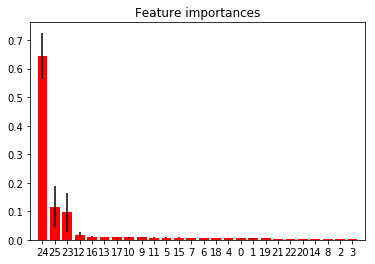

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

KeyError: 23